In [8]:
import numpy as np
import os
import pandas as pd
import h5py
import seaborn as sns
import matplotlib.pyplot as plt
from toolbox.utils import set_random_seed
from toolbox.plt_utils import density_scatter

In [9]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
os.environ['CUDA_DEVICE_ORDER'] = 'PCI_BUS_ID'
os.environ['CUDA_VISIBLE_DEVICES'] = '1'
# for TF To find gpu
os.environ["LD_LIBRARY_PATH"] = f"{os.environ['CONDA_PREFIX']}/lib:" + os.environ.get("LD_LIBRARY_PATH", "")

In [11]:
# set random seed for reproducibility
set_random_seed(seed=42)

2025-12-20 14:05:42.901320: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/valehvpa/miniconda3/envs/hist6/lib:/usr/local/cuda/lib64:/usr/local/cuda/lib64
2025-12-20 14:05:42.901344: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


TensorFlow not installed, skipping tf seeding.


/home/valehvpa/miniconda3/envs/hist6/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Seed set to 42


# chrombpoent debugging

In [6]:
p = "/home/valehvpa/projects/scCisTrans/chrombpnet-pytorch/output/fold_0/metrics.csv"
df = pd.read_csv(p)
df


,epoch,step,train_count_loss,train_count_pearson,train_loss,train_profile_loss,train_profile_pearson,val_count_loss,val_count_pearson,val_loss,val_profile_loss,val_profile_pearson
0,0,3190,NaN,NaN,NaN,NaN,NaN,0.909426,0.617945,1060.226562,991.110596,0.756252
1,0,3190,1.341471,0.411049,1157.842896,1055.890747,0.734339,NaN,NaN,NaN,NaN,NaN
2,1,6381,NaN,NaN,NaN,NaN,NaN,0.877033,0.650909,1016.791260,950.136780,0.775693
3,1,6381,0.960519,0.612061,1038.062744,965.063049,0.769962,NaN,NaN,NaN,NaN,NaN
4,2,9572,NaN,NaN,NaN,NaN,NaN,0.773535,0.671603,1002.859375,944.070923,0.778694
5,2,9572,0.899259,0.644059,998.754761,930.410339,0.780884,NaN,NaN,NaN,NaN,NaN
6,3,12763,NaN,NaN,NaN,NaN,NaN,0.733697,0.690722,991.277527,935.517151,0.783298
7,3,12763,0.849934,0.669321,975.065735,910.470398,0.786952,NaN,NaN,NaN,NaN,NaN
8,4,15954,NaN,NaN,NaN,NaN,NaN,0.836810,0.696796,995.524963,931.927734,0.785081
9,4,15954,0.815451,0.687572,958.758911,896.784119,0.790860,NaN,NaN,NaN,NaN,NaN


In [10]:
import wandb
wandb.init(project="histobpnet", name="manual_lei_chrombpnet_metrics_log2")
# artifact = wandb.Artifact("metrics_csv", type="dataset")
# artifact.add_file(p)
# wandb.log_artifact(artifact)
table = wandb.Table(dataframe=df)
wandb.log({"metrics_table": table})

## subsmaple

In [14]:
p = "/large_storage/goodarzilab/valehvpa/data/projects/scCisTrans/for_chrombpnet_tuto/lei_peaks.bed"
# read from bed and sumsample
lei_peaks_df = pd.read_csv(p, sep="\t", header=None)

p = "/large_storage/goodarzilab/valehvpa/data/projects/scCisTrans/for_chrombpnet_tuto/negatives/lei_negatives.bed"
lei_negatives_df = pd.read_csv(p, sep="\t", header=None)

print(lei_peaks_df, lei_negatives_df)

           0          1          2            3     4  5        6          7  \
0       chr1  100027916  100029541  Peak_168774   375  .  3.46597   37.52287   
1       chr1  100027916  100029541  Peak_212397   247  .  2.93255   24.75966   
2       chr1  100027916  100029541  Peak_231027   212  .  2.75187   21.27480   
3       chr1  100027916  100029541  Peak_240800   198  .  2.67162   19.80458   
4       chr1  100027916  100029541   Peak_64424  1000  .  8.38628  201.28123   
...      ...        ...        ...          ...   ... ..      ...        ...   
269713  chrY   11103101   11103309  Peak_137563   548  .  4.84445   54.86904   
269714  chrY   12394949   12395289  Peak_229097   217  .  3.12339   21.72005   
269715  chrY   12394949   12395289  Peak_261400   172  .  2.83655   17.28688   
269716  chrY   18992804   18993052  Peak_111927   802  .  5.92807   80.24894   
269717  chrY    4030688    4031055  Peak_100875   964  .  6.56550   96.46984   

                8     9  
0        35.5

In [15]:
!wc -l /large_storage/goodarzilab/valehvpa/data/projects/scCisTrans/for_chrombpnet_tuto/lei_peaks.bed
!wc -l /large_storage/goodarzilab/valehvpa/data/projects/scCisTrans/for_chrombpnet_tuto/negatives/lei_negatives.bed

/bin/bash: /home/valehvpa/miniconda3/envs/hist6/lib/libtinfo.so.6: no version information available (required by /bin/bash)
269718 /large_storage/goodarzilab/valehvpa/data/projects/scCisTrans/for_chrombpnet_tuto/lei_peaks.bed
/bin/bash: /home/valehvpa/miniconda3/envs/hist6/lib/libtinfo.so.6: no version information available (required by /bin/bash)
472962 /large_storage/goodarzilab/valehvpa/data/projects/scCisTrans/for_chrombpnet_tuto/negatives/lei_negatives.bed


In [23]:
# randomly subsample 1000 peaks and negatives and save to new bed files
n_sub = 40_000
lei_peaks_df_sampled = lei_peaks_df.sample(n=n_sub, random_state=42)
lei_peaks_df_sampled.to_csv(
    f"/large_storage/goodarzilab/valehvpa/data/projects/scCisTrans/for_chrombpnet_tuto/lei_peaks_ss_{n_sub}.bed",
    sep="\t", header=False, index=False)

lei_negatives_df_sampled = lei_negatives_df.sample(n=n_sub, random_state=42)
lei_negatives_df_sampled.to_csv(
    f"/large_storage/goodarzilab/valehvpa/data/projects/scCisTrans/for_chrombpnet_tuto/negatives/lei_negatives_ss_{n_sub}.bed",
    sep="\t", header=False, index=False)

In [22]:
!head /large_storage/goodarzilab/valehvpa/data/projects/scCisTrans/for_chrombpnet_tuto/lei_peaks_ss_1000.bed
!wc -l /large_storage/goodarzilab/valehvpa/data/projects/scCisTrans/for_chrombpnet_tuto/lei_peaks_ss_1000.bed

!head /large_storage/goodarzilab/valehvpa/data/projects/scCisTrans/for_chrombpnet_tuto/negatives/lei_negatives_ss_1000.bed
!wc -l /large_storage/goodarzilab/valehvpa/data/projects/scCisTrans/for_chrombpnet_tuto/negatives/lei_negatives_ss_1000.bed

/bin/bash: /home/valehvpa/miniconda3/envs/hist6/lib/libtinfo.so.6: no version information available (required by /bin/bash)
chr12	6532566	6533036	Peak_42711	1000	.	4.30188	349.82059	347.21072	139
chr5	135226186	135226478	Peak_87987	1000	.	4.99816	122.44863	120.19123	135
chr2	9070971	9071448	Peak_60357	1000	.	9.03456	221.08578	218.64418	296
chr3	38003407	38004705	Peak_181021	329	.	1.86632	32.93175	31.00591	917
chr1	226449800	226450190	Peak_113019	787	.	5.3749	78.77083	76.63297	228
chr1	120267928	120268479	Peak_79603	1000	.	4.76701	144.65266	142.34657	139
chr7	139767293	139768409	Peak_184825	316	.	3.05146	31.68775	29.77085	578
chr4	159118033	159118348	Peak_48318	1000	.	8.39765	299.57346	297.02344	132
chr9	14508888	14510011	Peak_267883	164	.	2.19029	16.47649	14.71437	461
chr1	151520149	151520692	Peak_212136	248	.	3.28844	24.82766	22.96885	352
/bin/bash: /home/valehvpa/miniconda3/envs/hist6/lib/libtinfo.so.6: no version information available (required by /bin/bash)
1000 /large_storage/good

More subsampling, for histobpnet

In [11]:
p = "/large_storage/goodarzilab/valehvpa/data/projects/scCisTrans/for_hist/gm12878_atac_encode/chrombpnet_data/peaks.all_input_regions.ENCSR868FGK.bed.gz"
peaks_df = pd.read_csv(p, sep="\t", header=None, compression='gzip')

p = "/large_storage/goodarzilab/valehvpa/data/projects/scCisTrans/for_hist/gm12878_atac_encode/chrombpnet_data/fold_0/nonpeaks.all_input_regions.fold_0.ENCSR868FGK.bed.gz"
negatives_df = pd.read_csv(p, sep="\t", header=None, compression='gzip')

print(peaks_df.shape, negatives_df.shape)

# randomly subsample peaks and negatives and save to new bed files
n_sub = 40_000
peaks_df_sampled = peaks_df.sample(n=n_sub, random_state=42)
peaks_df_sampled.to_csv(
    f"/large_storage/goodarzilab/valehvpa/data/projects/scCisTrans/for_hist/gm12878_atac_encode/chrombpnet_data/peaks.all_input_regions.ENCSR868FGK_{n_sub}.bed",
    sep="\t", header=False, index=False)

negatives_df_sampled = negatives_df.sample(n=n_sub, random_state=42)
negatives_df_sampled.to_csv(
    f"/large_storage/goodarzilab/valehvpa/data/projects/scCisTrans/for_hist/gm12878_atac_encode/chrombpnet_data/fold_0/nonpeaks.all_input_regions.fold_0.ENCSR868FGK_{n_sub}.bed",
    sep="\t", header=False, index=False)

!head /large_storage/goodarzilab/valehvpa/data/projects/scCisTrans/for_hist/gm12878_atac_encode/chrombpnet_data/peaks.all_input_regions.ENCSR868FGK_40000.bed
!wc -l /large_storage/goodarzilab/valehvpa/data/projects/scCisTrans/for_hist/gm12878_atac_encode/chrombpnet_data/peaks.all_input_regions.ENCSR868FGK_40000.bed

!head /large_storage/goodarzilab/valehvpa/data/projects/scCisTrans/for_hist/gm12878_atac_encode/chrombpnet_data/fold_0/nonpeaks.all_input_regions.fold_0.ENCSR868FGK_40000.bed
!wc -l /large_storage/goodarzilab/valehvpa/data/projects/scCisTrans/for_hist/gm12878_atac_encode/chrombpnet_data/fold_0/nonpeaks.all_input_regions.fold_0.ENCSR868FGK_40000.bed

(269718, 10) (472962, 10)
/bin/bash: /home/valehvpa/miniconda3/envs/hist6/lib/libtinfo.so.6: no version information available (required by /bin/bash)
chr12	6532566	6533036	Peak_42711	1000	.	4.30188	349.82059	347.21072	139
chr5	135226186	135226478	Peak_87987	1000	.	4.99816	122.44863	120.19123	135
chr2	9070971	9071448	Peak_60357	1000	.	9.03456	221.08578	218.64418	296
chr3	38003407	38004705	Peak_181021	329	.	1.86632	32.93175	31.00591	917
chr1	226449800	226450190	Peak_113019	787	.	5.3749	78.77083	76.63297	228
chr1	120267928	120268479	Peak_79603	1000	.	4.76701	144.65266	142.34657	139
chr7	139767293	139768409	Peak_184825	316	.	3.05146	31.68775	29.77085	578
chr4	159118033	159118348	Peak_48318	1000	.	8.39765	299.57346	297.02344	132
chr9	14508888	14510011	Peak_267883	164	.	2.19029	16.47649	14.71437	461
chr1	151520149	151520692	Peak_212136	248	.	3.28844	24.82766	22.96885	352
/bin/bash: /home/valehvpa/miniconda3/envs/hist6/lib/libtinfo.so.6: no version information available (required by /bin/bash

# Why/is my model perf too good?

## Understand hv2 perf

One hypothesis I had looking at this: https://wandb.ai/valehamiri/histobpnet/runs/4x2oamos?nw=nwuservalehamiri
is that maybe the reason why within a single epoch the model val is already pretty good (btw note that the reason train perf in epoch 0 is not as good is because the train perf "includes" the model s leansring through the epcoh while the val perf is basically how well that tuned model at epoch 0 does on teh val set) is mayeb that all the model needed to learn was like a scaling factor between predited atac (aka predcitd bias correcgted log atac in the summit centered 1k window) and either hte chip log fold change or the chip log counts. And presumably after that, the model just starts overfitting.

In [12]:
obs_atac = "/large_storage/goodarzilab/valehvpa/data/projects/scCisTrans/for_hist/gm12878_atac_encode/data/ENCFF180XQC.bigWig"
pred_corr_atac = "/large_storage/goodarzilab/valehvpa/data/projects/scCisTrans/for_hist/gm12878_atac_encode/data/ENCFF873JQP.bigWig"
chip = "/large_storage/goodarzilab/valehvpa/data/projects/scCisTrans/for_borzoi/histone/peak_scramble/maya_coverage/all_reps.bw"
inputc = "/large_storage/goodarzilab/valehvpa/data/projects/scCisTrans/for_borzoi/histone/peak_scramble/maya_coverage/inputc/inputc.bw"

import pyBigWig
obs_atac_bw = pyBigWig.open(obs_atac)
pred_corr_atac_bw = pyBigWig.open(pred_corr_atac)
chip_bw = pyBigWig.open(chip)
inputc_bw = pyBigWig.open(inputc)

In [13]:
# see 12_1_2025.ipynb for how this bed file was created
atac_hgp_map="/large_storage/goodarzilab/valehvpa/data/projects/scCisTrans/for_hist/histobpnet_v2/data/reverse_extended_gapped_peak_histone_intersect_2114bp_atac_for_train.bed"
atac_hgp_df = pd.read_csv(
    atac_hgp_map,
    sep="\t",
    header=0,
    index_col=False,
)
atac_hgp_df["length"] = atac_hgp_df['end'] - atac_hgp_df['start']

# set out_start and out_end to be the start and end of a 1000bp region centered on the middle of the peak
atac_hgp_df["out_start"] = atac_hgp_df['start'] + (atac_hgp_df['length'] // 2) - 500
atac_hgp_df["out_end"] = atac_hgp_df['start'] + (atac_hgp_df['length'] // 2) + 500
atac_hgp_df

df = atac_hgp_df

In [7]:
(39778+41892)//2, (40335+41335)//2, 39778+(2114//2)

(40835, 40835, 40835)

In [28]:
def get_cts(
    peaks_df,
    bw,
    chr_key: str = 'chrom',
    start_key: str = 'start',
    end_key: str = 'end',
):
    vals = []

    for _, r in peaks_df.iterrows():
        if r[chr_key] == ".":
            vals.append(np.array([0]))
        else:
            vals.append(np.array([
                np.nansum(bw.values(r[chr_key],
                                    r[start_key],
                                    r[end_key]))
            ]))

    return vals

obs_atac_cts = get_cts(df, obs_atac_bw, start_key="out_start", end_key="out_end")
# pred_corr_atac_cts = get_cts(df, pred_corr_atac_bw, start_key="out_start", end_key="out_end")
chip_cts = get_cts(df, chip_bw, chr_key='hist_chrom', start_key='hist_start', end_key='hist_end')
inputc_cts = get_cts(df, inputc_bw, chr_key='hist_chrom', start_key='hist_start', end_key='hist_end')

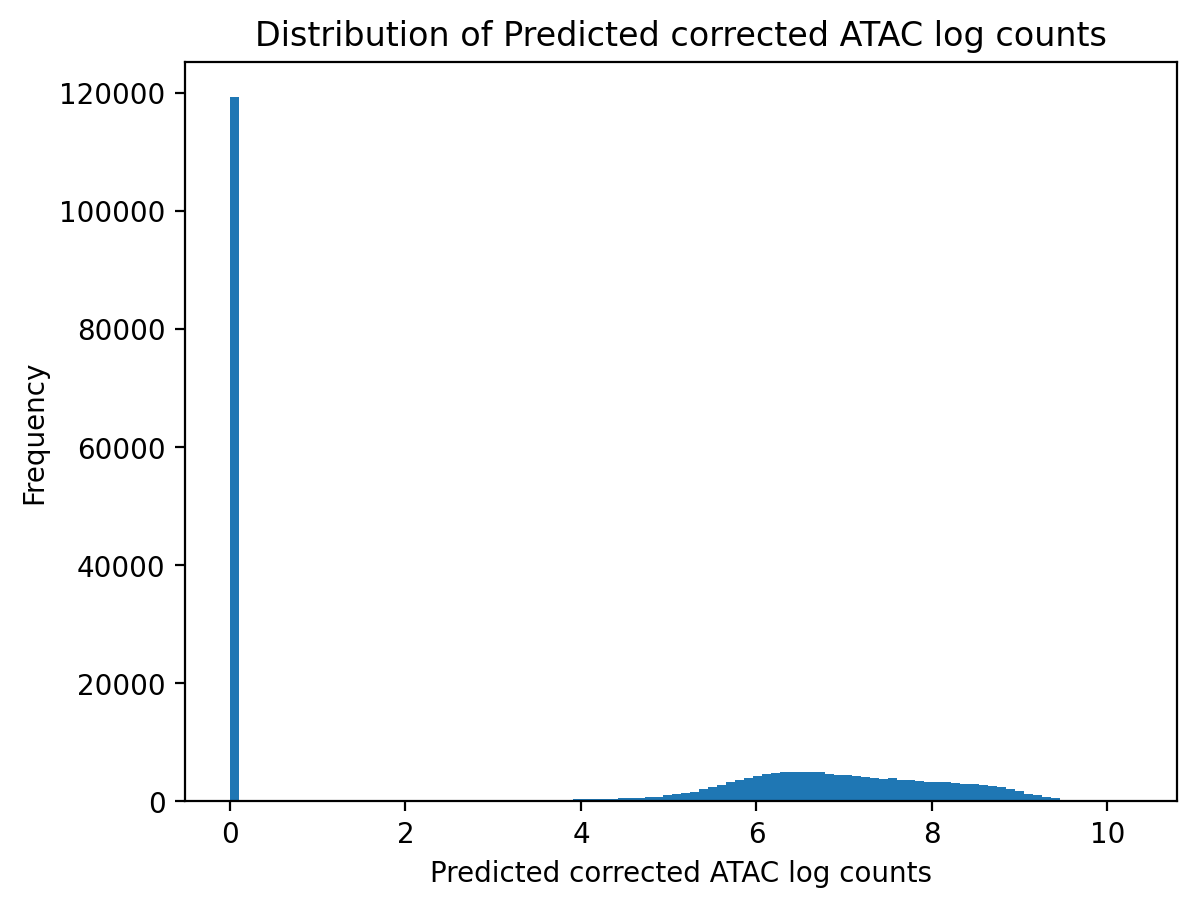

In [23]:
# distirbution of pred_corr_atac_cts
import numpy as np
import matplotlib.pyplot as plt
plt.hist(np.log1p(pred_corr_atac_cts), bins=100)
plt.xlabel("Predicted corrected ATAC log counts")
plt.ylabel("Frequency")
plt.title("Distribution of Predicted corrected ATAC log counts")
plt.show()

why are there so many zeros?

In [24]:
pred_corr_atac_cts = [x[0] for x in pred_corr_atac_cts]

In [27]:
df["pred_corr_atac_cts"] = pred_corr_atac_cts
df["peak_id"] = df["chrom"] + ":" + df["start"].astype(str) + "-" + df["end"].astype(str)
df

,chrom,start,end,hist_chrom,hist_start,hist_end,length,out_start,out_end,pred_corr_atac_cts,peak_id
0,chr1,39778,41892,.,-1,-1,2114,40335,41335,0.0,chr1:39778-41892
1,chr1,40034,42148,.,-1,-1,2114,40591,41591,0.0,chr1:40034-42148
2,chr1,40545,42659,.,-1,-1,2114,41102,42102,0.0,chr1:40545-42659
3,chr1,41223,43337,.,-1,-1,2114,41780,42780,0.0,chr1:41223-43337
4,chr1,45439,47553,.,-1,-1,2114,45996,46996,0.0,chr1:45439-47553
...,...,...,...,...,...,...,...,...,...,...,...
269713,chrY,11097555,11099669,.,-1,-1,2114,11098112,11099112,0.0,chrY:11097555-11099669
269714,chrY,11102145,11104259,.,-1,-1,2114,11102702,11103702,0.0,chrY:11102145-11104259
269715,chrY,12393985,12396099,.,-1,-1,2114,12394542,12395542,0.0,chrY:12393985-12396099
269716,chrY,12394138,12396252,.,-1,-1,2114,12394695,12395695,0.0,chrY:12394138-12396252


Pretty sure it s because in encode they only submt predictions for certain select regions, not genome wide

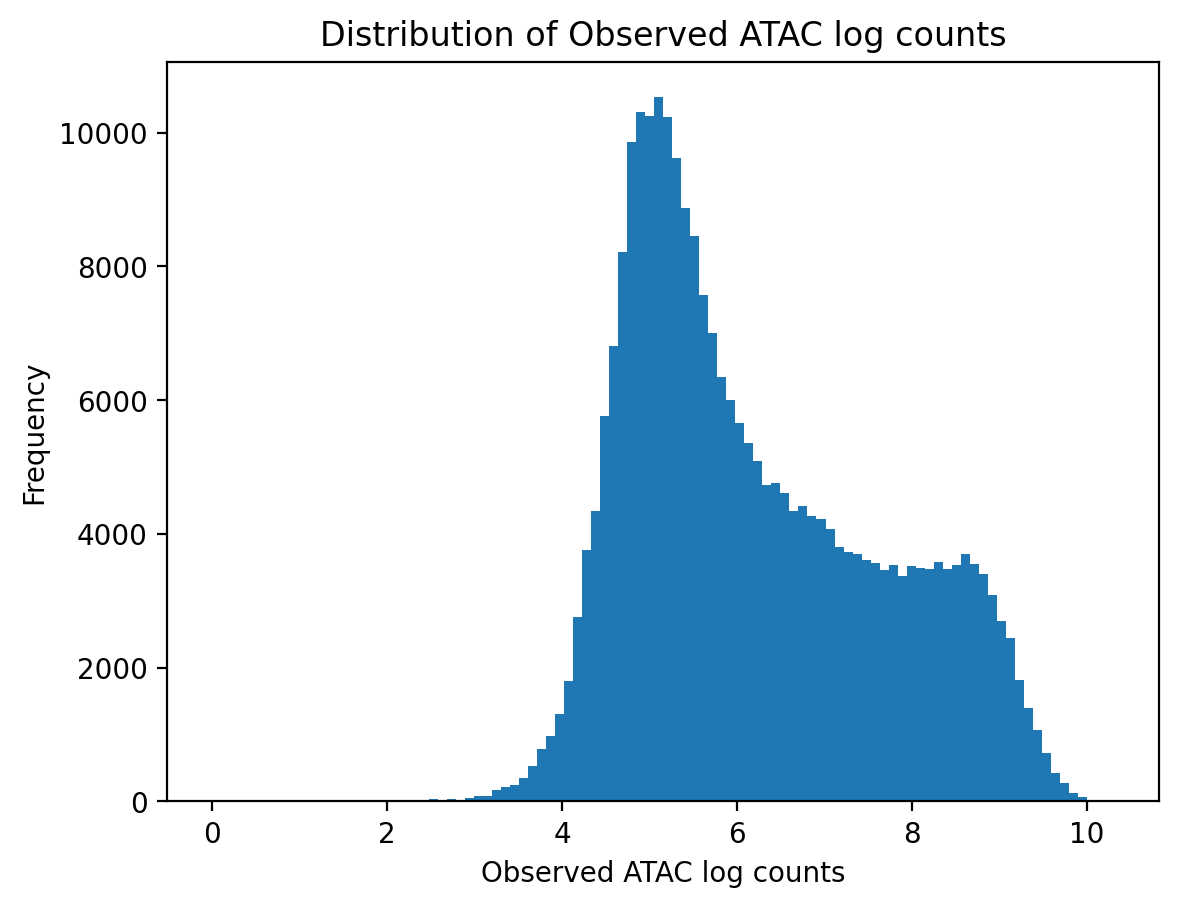

In [29]:
# distirbution of observed atac_cts
import numpy as np
import matplotlib.pyplot as plt
plt.hist(np.log1p(obs_atac_cts), bins=100)
plt.xlabel("Observed ATAC log counts")
plt.ylabel("Frequency")
plt.title("Distribution of Observed ATAC log counts")
plt.show()

In [ ]:
lfc = []
for o, p in zip(chip_cts, inputc_cts):
    lfc.append(np.log2((o[0] + 1) / (p[0] + 1)))
lfc = np.array(lfc)

obs_atac_cts = [v[0] for v in obs_atac_cts]
# pred_corr_atac_cts = [v[0] for v in pred_corr_atac_cts]
obs_atac_cts = np.array(obs_atac_cts).squeeze()
pred_corr_atac_cts = np.array(pred_corr_atac_cts).squeeze()

chip_cts = np.array([v[0] for v in chip_cts]).squeeze()
inputc_cts = np.array([v[0] for v in inputc_cts]).squeeze()

In [33]:
df["obs_atac_cts"] = obs_atac_cts
df["lfc_chip_inputc"] = lfc
df["chip_cts"] = chip_cts
df["inputc_cts"] = inputc_cts
df

,chrom,start,end,hist_chrom,hist_start,hist_end,length,out_start,out_end,pred_corr_atac_cts,peak_id,obs_atac_cts,lfc_chip_inputc,chip_cts,inputc_cts
0,chr1,39778,41892,.,-1,-1,2114,40335,41335,0.0,chr1:39778-41892,43.0,0.0,0.0,0.0
1,chr1,40034,42148,.,-1,-1,2114,40591,41591,0.0,chr1:40034-42148,53.0,0.0,0.0,0.0
2,chr1,40545,42659,.,-1,-1,2114,41102,42102,0.0,chr1:40545-42659,49.0,0.0,0.0,0.0
3,chr1,41223,43337,.,-1,-1,2114,41780,42780,0.0,chr1:41223-43337,49.0,0.0,0.0,0.0
4,chr1,45439,47553,.,-1,-1,2114,45996,46996,0.0,chr1:45439-47553,67.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269713,chrY,11097555,11099669,.,-1,-1,2114,11098112,11099112,0.0,chrY:11097555-11099669,54.0,0.0,0.0,0.0
269714,chrY,11102145,11104259,.,-1,-1,2114,11102702,11103702,0.0,chrY:11102145-11104259,2.0,0.0,0.0,0.0
269715,chrY,12393985,12396099,.,-1,-1,2114,12394542,12395542,0.0,chrY:12393985-12396099,25.0,0.0,0.0,0.0
269716,chrY,12394138,12396252,.,-1,-1,2114,12394695,12395695,0.0,chrY:12394138-12396252,24.0,0.0,0.0,0.0


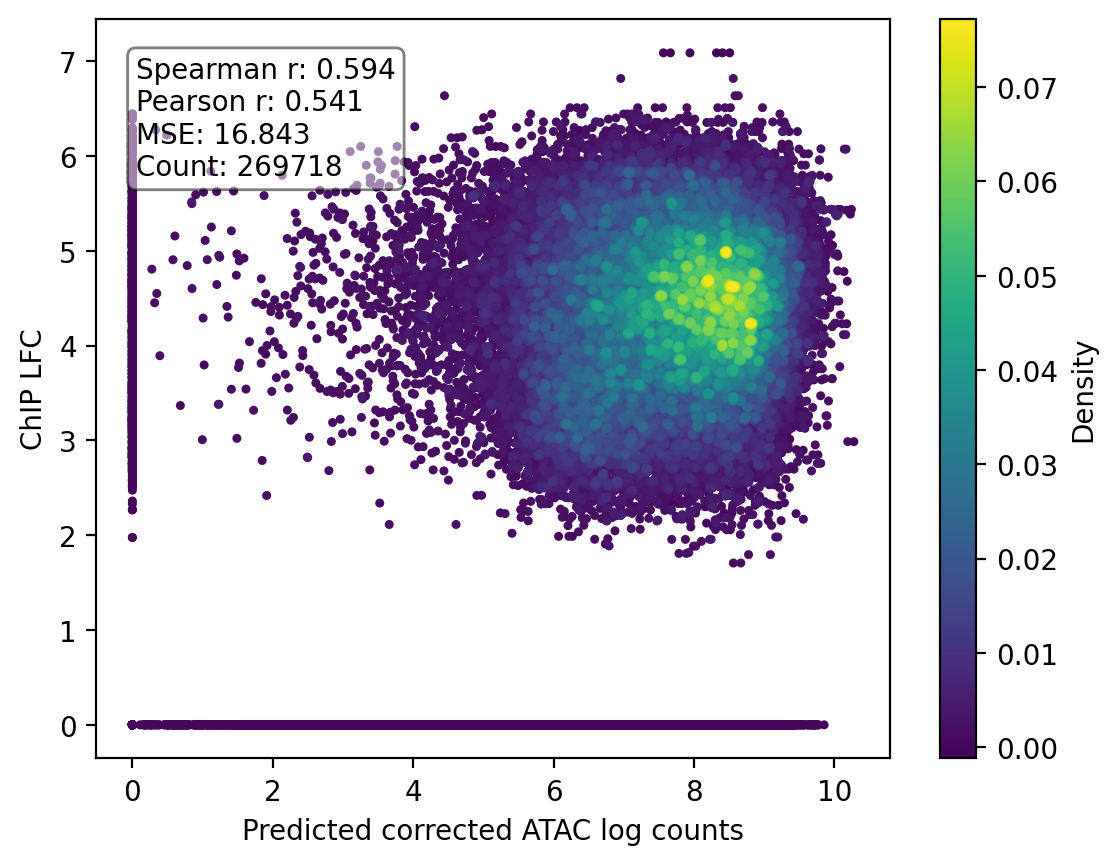

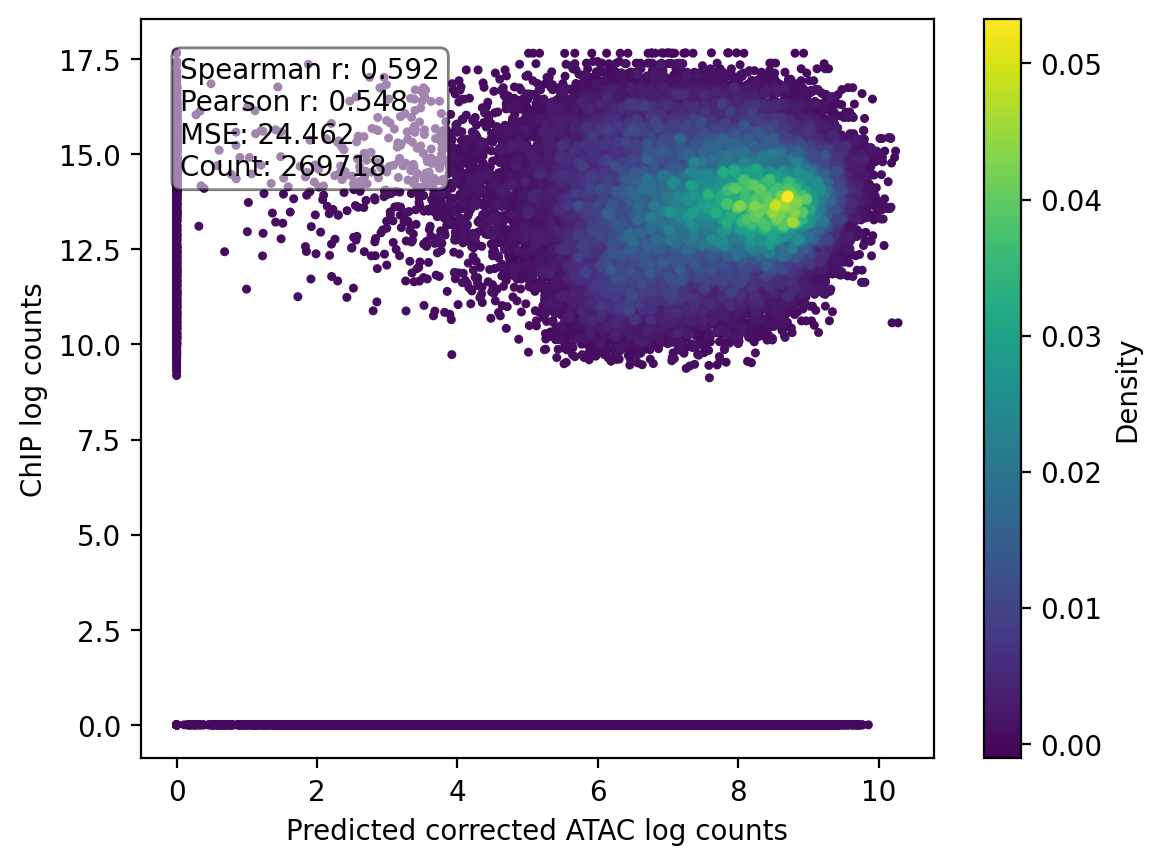

In [32]:
density_scatter(np.log1p(pred_corr_atac_cts), lfc, "Predicted corrected ATAC log counts", "ChIP LFC", s=5, bins=200, incl_stats=True) 
plt.show()

density_scatter(np.log1p(pred_corr_atac_cts), np.log1p(chip_cts), "Predicted corrected ATAC log counts", "ChIP log counts", s=5, bins=200, incl_stats=True) 
plt.show()

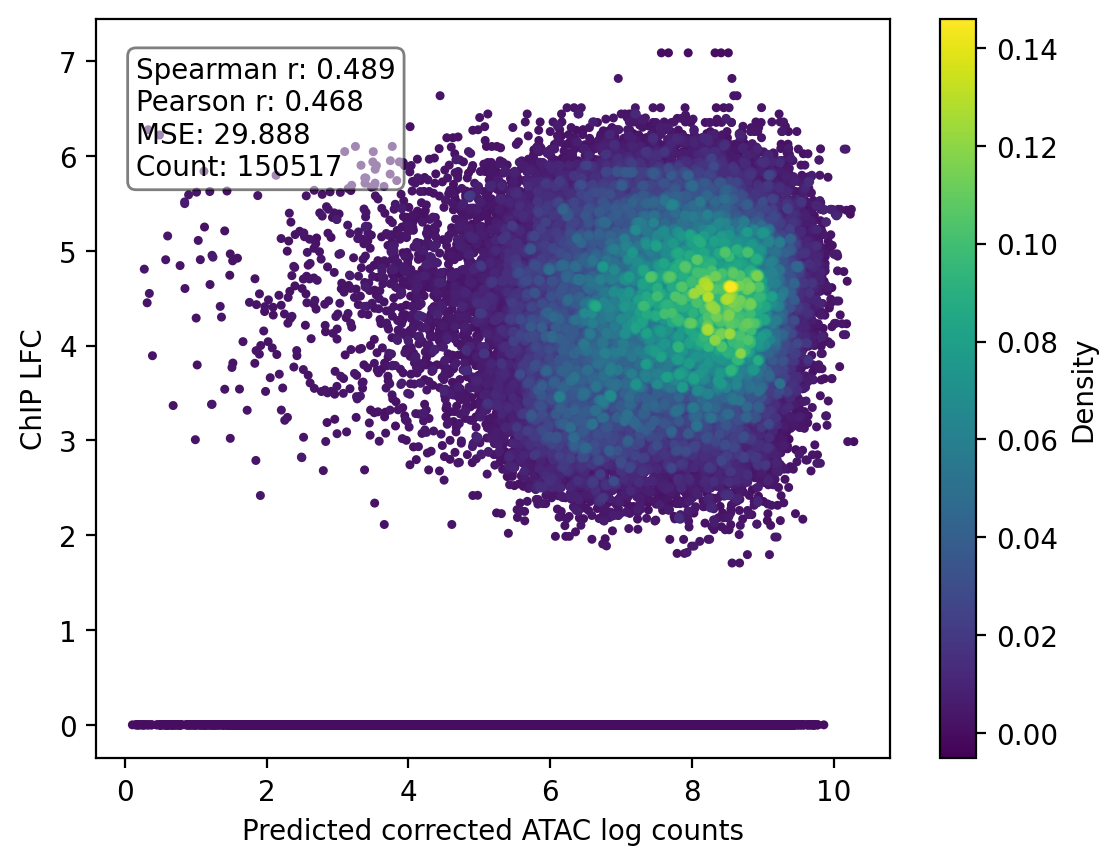

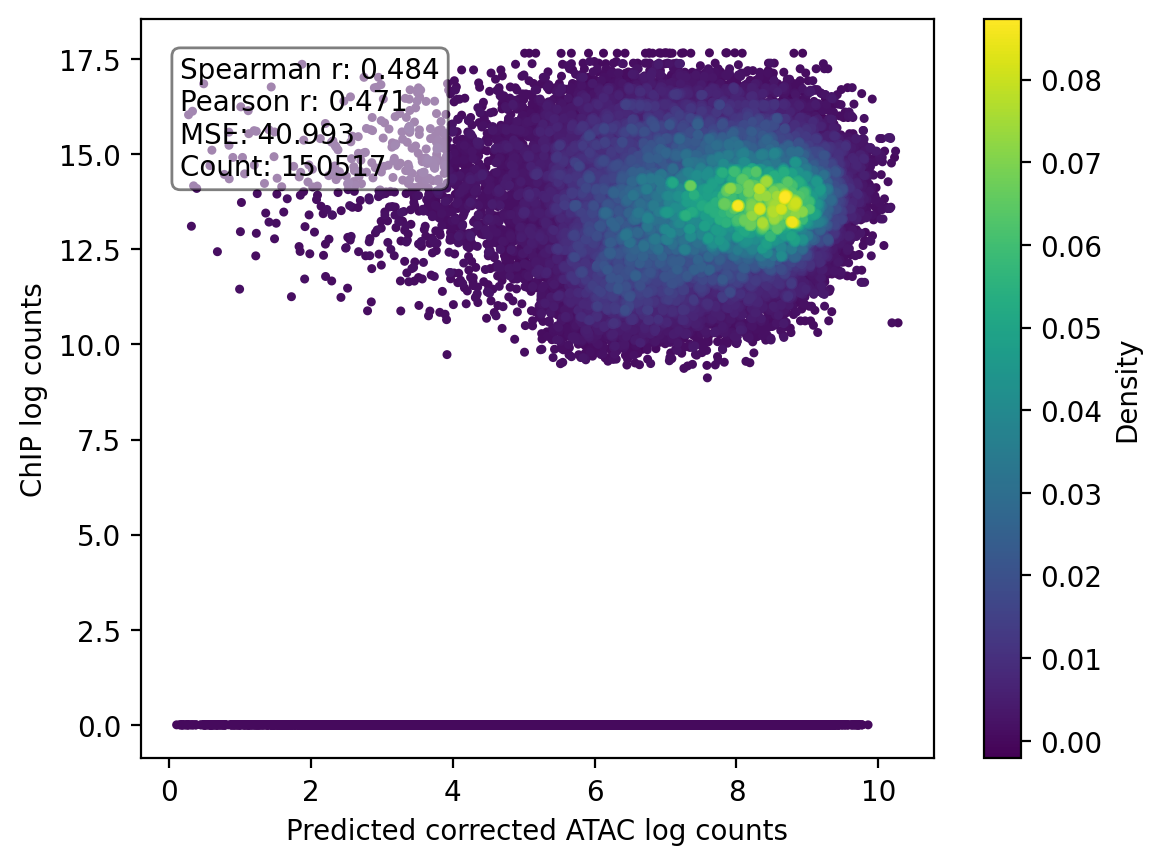

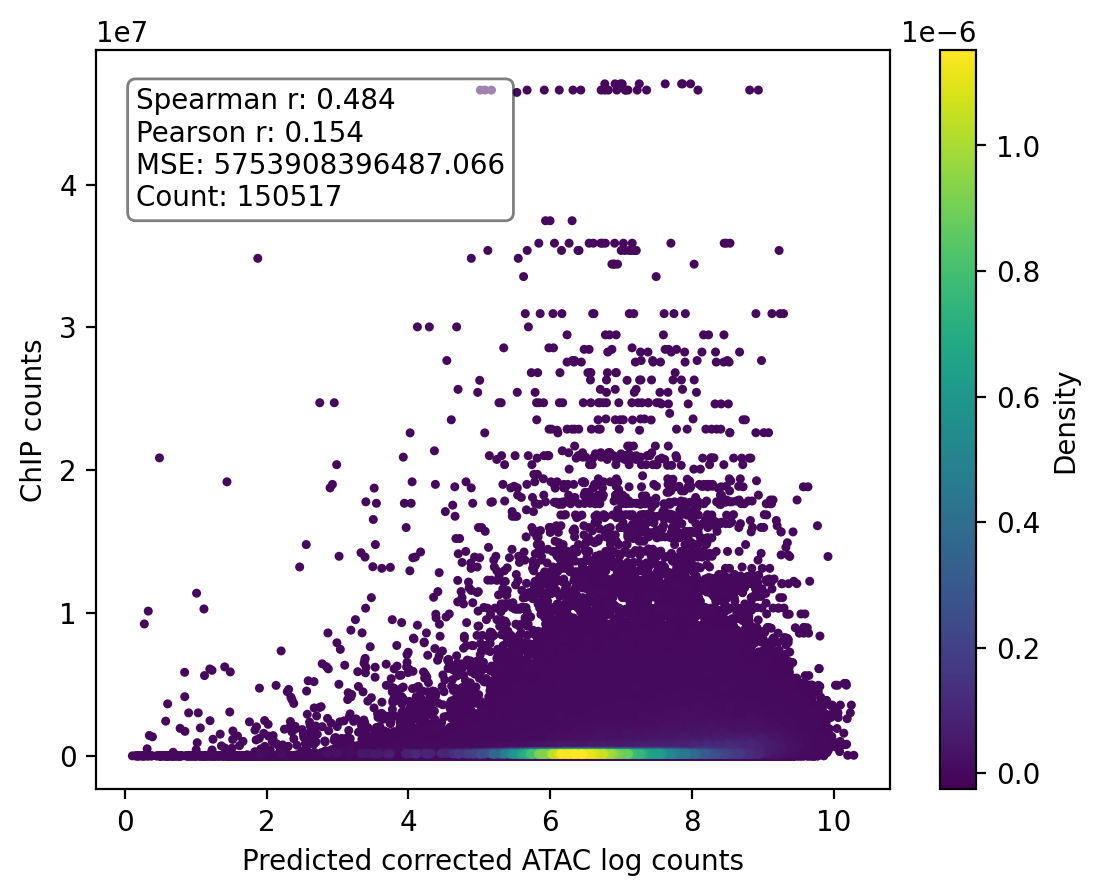

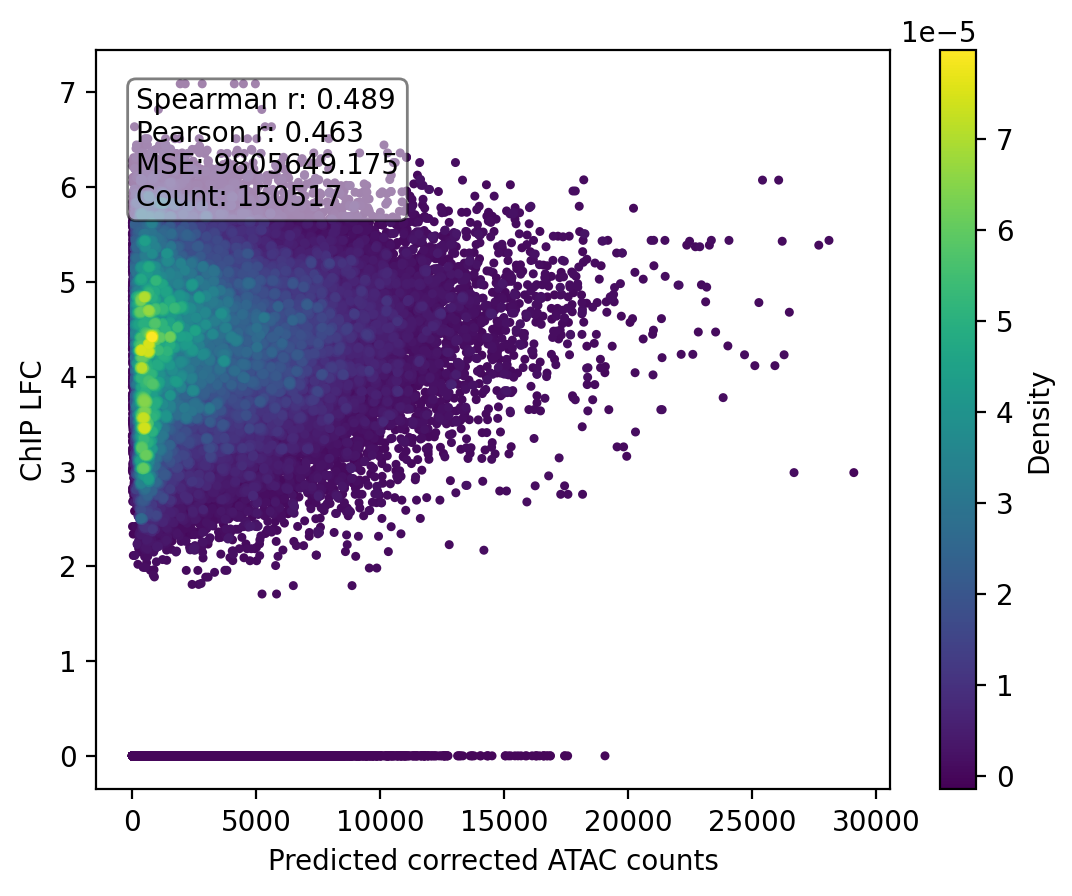

In [43]:
df2 = df[df["pred_corr_atac_cts"] > 0].reset_index(drop=True)

density_scatter(np.log1p(df2["pred_corr_atac_cts"]), df2["lfc_chip_inputc"], "Predicted corrected ATAC log counts", "ChIP LFC", s=5, bins=200, incl_stats=True) 
plt.show()

density_scatter(np.log1p(df2["pred_corr_atac_cts"]), np.log1p(df2["chip_cts"]), "Predicted corrected ATAC log counts", "ChIP log counts", s=5, bins=200, incl_stats=True) 
plt.show()

density_scatter(np.log1p(df2["pred_corr_atac_cts"]), df2["chip_cts"], "Predicted corrected ATAC log counts", "ChIP counts", s=5, bins=200, incl_stats=True) 
plt.show()

density_scatter(df2["pred_corr_atac_cts"], df2["lfc_chip_inputc"], "Predicted corrected ATAC counts", "ChIP LFC", s=5, bins=200, incl_stats=True) 
plt.show()

Hmm ok there doesnt seem to be a correlation... anyway moving on for now

# Are inputc and chip correlated in peak regions?

In theory they shouldnt be.


I copied this code from 12_5_2025.ipynb. In that notebook we saw that they seemed pretty damn correlated, but I wonder if it was there was a length confounding factor (ie longer peaks have more counts in both chip and inputc). Here I ll do the same but conditition on the same peak lengths.

In [51]:
p = "/large_storage/goodarzilab/valehvpa/data/projects/scCisTrans/for_borzoi/histone/peak_scramble/maya_gapped_peaks/gm12878_h3k27ac_peaks.gappedPeak.canonical"
chip = "/large_storage/goodarzilab/valehvpa/data/projects/scCisTrans/for_borzoi/histone/peak_scramble/maya_coverage/all_reps.bw"
inputc = "/large_storage/goodarzilab/valehvpa/data/projects/scCisTrans/for_borzoi/histone/peak_scramble/maya_coverage/inputc/inputc.bw"

df = pd.read_csv(
    p,
    sep="\t",
    header=None,
    index_col=False,
)
df["length"] = df[2] - df[1]
df.rename(columns={0: 'chrom', 1: 'start', 2: 'end'}, inplace=True)

import pyBigWig
chip_bw = pyBigWig.open(chip)
inputc_bw = pyBigWig.open(inputc)

In [52]:
df["length"].describe()

count    45097.000000
mean      2454.767634
std       2759.216908
min        252.000000
25%        979.000000
50%       1657.000000
75%       2892.000000
max      67994.000000
Name: length, dtype: float64

In [53]:
q25 = df["length"].quantile(0.25)
q25

979.0

75% are larger than this ^ keep those. we ll round it to 1000

In [54]:
df2 = df[df["length"] >= 1000].reset_index(drop=True)

In [55]:
def get_cts(
    peaks_df,
    bw,
    width: int,
    get_total_cts: bool = False,
):
    vals = []

    for _, r in peaks_df.iterrows():
        # w = r['length'] if width is None else width
        if width is not None:
            assert width % 2 == 0
            # take window of length width around center
            center = (r['start'] + r['end']) // 2
            start = center - (width // 2)
            end = center + (width // 2)
        else:
            start = r['start']
            end = r['end']
        if not get_total_cts:
            vals.append(
                np.nan_to_num(bw.values(r['chrom'],
                                        start,
                                        end))
            )
        else:
            vals.append(np.array([
                np.nansum(bw.values(r['chrom'],
                                    start,
                                    end))
            ]))

    return vals

chip_cts = get_cts(df2, chip_bw, 1000, get_total_cts=True)
inputc_cts = get_cts(df2, inputc_bw, 1000, get_total_cts=True)

In [56]:
chip_cts = np.array([v[0] for v in chip_cts]).squeeze()
inputc_cts = np.array([v[0] for v in inputc_cts]).squeeze()

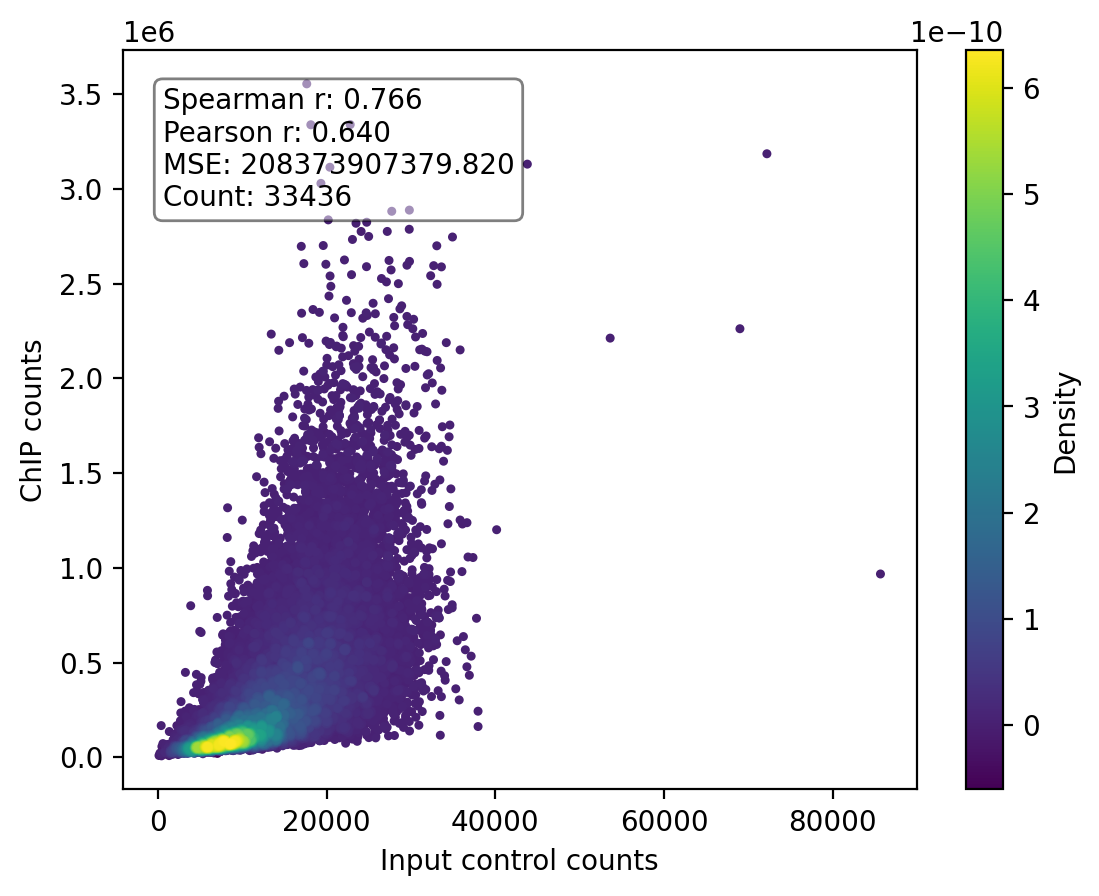

In [57]:
# plot chip_cts vs inputc_cts
density_scatter(inputc_cts, chip_cts, "Input control counts", "ChIP counts", s=5, bins=200, incl_stats=True) 
plt.show()